# Data Analysis

## Table of Content:
* [Gap Analysis](#Gap-Analysis)
* [Signal Bar Analysis](#Signal-Bar-Analysis)
* [Profit Calculation](#Profit-Calculation)
* [Day Night Comparison](#Day-Night-Comparison)
* [Trading Statistics](#Trading-Statistics)



## Import Libraries

In [1]:
# import libraries
import pandas as pd
# set print options to the maximum
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.options.display.max_colwidth=200
# remove scientific float printing
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
#sticky printing
from IPython.display import HTML

## Load Metadata

In [2]:
# read meta data od data used in this notebook
meta=pd.read_csv('meta.csv')
# observe whole data with stickey label
df_html = meta.to_html() 
    # CSS styling 
style = """
    <style scoped>
    .dataframe-div {
      max-height: 300px;
      overflow: auto;
      position: relative;
    }

    .dataframe thead th {
      position: -webkit-sticky; /* for Safari */
      position: sticky;
      top: 0;
      background: white;
      color: black;
    }

    .dataframe thead th:first-child {
      left: 0;
      z-index: 1;
    }

    .dataframe tbody tr th:only-of-type {
            vertical-align: middle;
        }

    .dataframe tbody tr th {
      position: -webkit-sticky; /* for Safari */
      position: sticky;
      left: 0;
      background: white;
      color: black;
      vertical-align: top;
    }
</style>
"""
    # Concatenating to single string
df_html = style+'<div class="dataframe-div">'+df_html+"\n</div>"

    # Displaying df with sticky header and index
HTML(df_html)

,file name,description,minutes
0,data,whole downloaded data from barchart,1
1,historical_cleaned,cleaned form of data,1
2,fifteen,cleaned data,15
3,fifteen_day,data of day(6:30) in 15 framing,15
4,fifteen_night,data of night(1:15) in 15 framing,15
5,days,framing data into days,whole day
6,day,data in day,day
7,night,data in night,night
8,day_days,the whole day of data in day (06:30),whole day
9,night_days,the whole day of data in nigth (01:15),whole day


# Gap Analysis

## 1)  Data preparation.

#### Load day data (6:30) which is in days format and days data

In [3]:
# read both of data in days framing and in 15 minutes framing(day only)
day_days=pd.read_csv('day_days.csv',index_col=0)
days=pd.read_csv('days.csv',index_col=0)

#### Observe both of data frames

In [4]:
day_days.tail(100)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
4436,2021-02-24,NQH21,13073.750,13330.000,12958.000,13329.250,1.940,415959.000
4437,2021-02-25,NQH21,13180.750,13290.000,12764.000,12832.000,-2.600,687736.000
4438,2021-02-26,NQH21,12952.750,13089.500,12752.000,12890.250,-0.370,547988.000
4439,2021-02-27,NaN,nan,nan,nan,nan,0.000,0.000
4440,2021-02-28,NaN,nan,nan,nan,nan,0.000,0.000
4441,2021-03-01,NQH21,13099.250,13308.000,13040.500,13299.750,1.440,353657.000
4442,2021-03-02,NQH21,13297.500,13303.000,13048.250,13077.250,-1.560,418529.000
4443,2021-03-03,NQH21,13012.750,13052.000,12668.250,12673.750,-2.560,586050.000
4444,2021-03-04,NQH21,12664.250,12797.000,12306.500,12480.000,-1.380,818709.000
4445,2021-03-05,NQH21,12582.750,12697.750,12207.250,12656.500,0.760,752789.000


In [5]:
days.tail(100)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
4436,2021-02-24,NQH21,13134.000,13353.750,12958.000,13293.250,1.490,628000.000
4437,2021-02-25,NQH21,13294.000,13302.250,12662.250,12792.000,-3.790,933450.000
4438,2021-02-26,NQH21,12792.250,13089.500,12717.500,12905.750,1.000,701826.000
4439,2021-02-27,NaN,nan,nan,nan,nan,0.000,0.000
4440,2021-02-28,NQH21,12957.500,13133.000,12946.250,13113.000,1.600,68749.000
4441,2021-03-01,NQH21,13112.250,13328.250,13034.750,13190.500,0.620,498497.000
4442,2021-03-02,NQH21,13190.000,13303.000,13048.250,13170.750,-0.060,547939.000
4443,2021-03-03,NQH21,13169.750,13192.000,12511.250,12665.000,-3.800,786676.000
4444,2021-03-04,NQH21,12665.000,12797.000,12304.500,12413.750,-2.020,1036612.000
4445,2021-03-05,NQH21,12414.000,12697.750,12207.250,12652.500,2.080,908471.000


In [6]:
days.tail(10)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
4526,2021-05-25,NQM21,13656.500,13738.750,13606.750,13695.000,0.220,434306.000
4527,2021-05-26,NQM21,13694.250,13728.500,13656.000,13707.750,0.220,337375.000
4528,2021-05-27,NQM21,13707.500,13720.750,13620.250,13703.000,0.070,385584.000
4529,2021-05-28,NQM21,13703.250,13763.500,13662.750,13686.500,-0.150,357217.000
4530,2021-05-29,NaN,nan,nan,nan,nan,0.000,0.000
4531,2021-05-30,NQM21,13699.000,13719.500,13695.500,13712.500,0.200,4542.000
4532,2021-05-31,NQM21,13712.750,13718.250,13651.500,13686.250,-0.140,48301.000
4533,2021-06-01,NQM21,13686.000,13773.000,13592.250,13634.750,-0.470,397319.000
4534,2021-06-02,NQM21,13634.750,13712.750,13603.250,13686.500,0.530,367532.000
4535,2021-06-03,NQM21,13687.000,13707.750,13462.250,13596.500,-0.720,301020.000


In [7]:
# convert the 'Time' column to date data type so that we can merge between it and the data in days.
day_days['Time']=pd.to_datetime(day_days['Time'],errors='coerce')

In [8]:
day_days.tail(10)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
4526,2021-05-25,NQM21,13713.500,13738.750,13675.750,13700.750,-0.080,42952.000
4527,2021-05-26,NQM21,13688.750,13728.500,13672.500,13689.500,0.090,44197.000
4528,2021-05-27,NQM21,13676.000,13682.750,13620.250,13677.750,0.060,55935.000
4529,2021-05-28,NQM21,13666.750,13726.000,13662.750,13689.500,0.260,38986.000
4530,2021-05-29,NaN,nan,nan,nan,nan,0.000,0.000
4531,2021-05-30,NaN,nan,nan,nan,nan,0.000,0.000
4532,2021-05-31,NQM21,13696.750,13712.000,13657.000,13675.500,-0.150,18167.000
4533,2021-06-01,NQM21,13691.250,13756.750,13689.000,13746.750,0.330,43611.000
4534,2021-06-02,NQM21,13637.500,13676.500,13616.750,13664.250,0.190,38051.000
4535,2021-06-03,NQM21,13679.000,13679.500,13511.000,13557.000,-0.980,84021.000


#### Select day's low and high.

In [9]:
# make a new data frame called days_min_max in which we obtained the low and the high of the day as a whole
days_min_max=days[['Time','Low','High']]
# rename these column so that we can merge with no overlappong in columns name
days_min_max=days_min_max[['Time','Low','High']].rename(columns={"Low":"Day_Low","High":"Day_High"})
# convert this column to date data type to be identical with the previous 'Time' column
days_min_max['Time']=pd.to_datetime(days_min_max['Time'],errors='coerce')
# observe the result
days_min_max.head()

,Time,Day_Low,Day_High
0,2009-01-02,1204.000,1268.250
1,2009-01-03,nan,nan
2,2009-01-04,1244.250,1254.250
3,2009-01-05,1244.250,1275.000
4,2009-01-06,1260.750,1287.000


In [10]:
days_min_max.tail(10)

,Time,Day_Low,Day_High
4526,2021-05-25,13606.750,13738.750
4527,2021-05-26,13656.000,13728.500
4528,2021-05-27,13620.250,13720.750
4529,2021-05-28,13662.750,13763.500
4530,2021-05-29,nan,nan
4531,2021-05-30,13695.500,13719.500
4532,2021-05-31,13651.500,13718.250
4533,2021-06-01,13592.250,13773.000
4534,2021-06-02,13603.250,13712.750
4535,2021-06-03,13462.250,13707.750


#### Merge both of the data frames.

In [11]:
# merge the two dataframes on 'Time' column where they have a common date
# then to drop null values resulted from some missing data
day_merge_days=pd.merge(day_days, days_min_max, on='Time', how='outer').dropna()
# save the merged data frame for later questions in a file called 'day_merge_days'
day_merge_days.to_csv('day_merge_days.csv')
day_merge_days.head()

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Day_Low,Day_High
0,2009-01-02,NQH09,1211.500,1268.250,1208.250,1253.750,3.400,178135.000,1204.000,1268.250
3,2009-01-05,NQH09,1255.000,1275.000,1244.750,1263.750,0.700,191559.000,1244.250,1275.000
4,2009-01-06,NQH09,1272.250,1287.000,1265.500,1270.250,-0.170,250301.000,1260.750,1287.000
5,2009-01-07,NQH09,1253.000,1257.000,1227.500,1241.250,-0.980,256340.000,1227.500,1268.750
6,2009-01-08,NQH09,1233.750,1252.750,1222.750,1249.250,1.240,238935.000,1222.750,1254.500


In [12]:
day_merge_days.tail(10)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Day_Low,Day_High
4522,2021-05-21,NQM21,13512.000,13548.750,13500.500,13533.500,0.080,44458.000,13395.750,13570.000
4525,2021-05-24,NQM21,13430.000,13519.000,13423.750,13515.000,0.630,38448.000,13360.500,13686.000
4526,2021-05-25,NQM21,13713.500,13738.750,13675.750,13700.750,-0.080,42952.000,13606.750,13738.750
4527,2021-05-26,NQM21,13688.750,13728.500,13672.500,13689.500,0.090,44197.000,13656.000,13728.500
4528,2021-05-27,NQM21,13676.000,13682.750,13620.250,13677.750,0.060,55935.000,13620.250,13720.750
4529,2021-05-28,NQM21,13666.750,13726.000,13662.750,13689.500,0.260,38986.000,13662.750,13763.500
4532,2021-05-31,NQM21,13696.750,13712.000,13657.000,13675.500,-0.150,18167.000,13651.500,13718.250
4533,2021-06-01,NQM21,13691.250,13756.750,13689.000,13746.750,0.330,43611.000,13592.250,13773.000
4534,2021-06-02,NQM21,13637.500,13676.500,13616.750,13664.250,0.190,38051.000,13603.250,13712.750
4535,2021-06-03,NQM21,13679.000,13679.500,13511.000,13557.000,-0.980,84021.000,13462.250,13707.750


In [13]:
# shift down by 1 observaion 
# to have the previous low and high of the whole day
# then to create two new columns into the merged data frame.
Pre_Low=day_merge_days['Day_Low'].shift(1)
day_merge_days.insert(4,'Yesterday_Low',Pre_Low)
Pre_High=day_merge_days['Day_High'].shift(1)
day_merge_days.insert(3,'Yesterday_High',Pre_High)


In [14]:
# remove null values obtained from incompatible dates.
day_merge_days.dropna(inplace=True)

## Gap Down Analysis.

In [15]:
# gap down condition is to have an open below the previous day low
GapDown=day_merge_days[day_merge_days['Open'] < day_merge_days['Yesterday_Low']]

### 2) Q- What proportion of having gap down periods?

In [16]:
# proportion of gap down periods in data in days accordong to the whole days
GapDown.shape[0]/day_merge_days.shape[0]

0.09843260188087774

> 9.9% of data includes gap down

##### Using the moving average techinque comparing shifted values of close in different periods

In [17]:
# first observe GapDown dimensions
GapDown.shape[0]

314

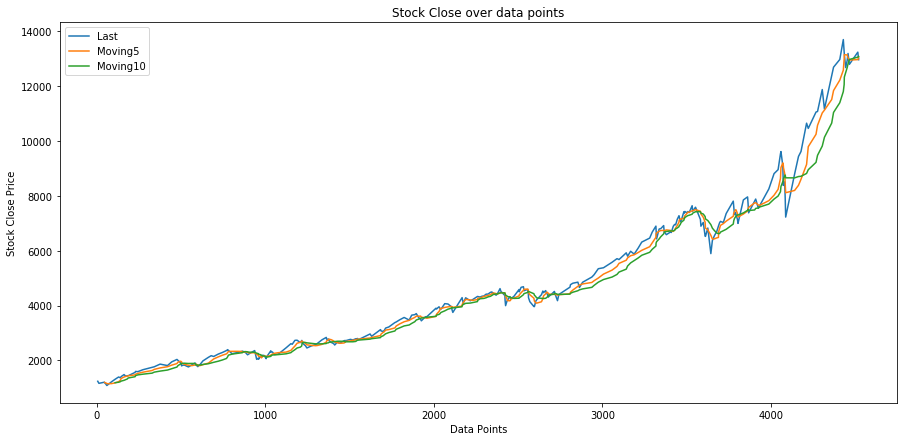

In [18]:
# making a window of 5 and 10 observations               
Moving5=GapDown['Last'].rolling(5).mean()
Moving10=GapDown['Last'].rolling(10).mean()
GapDown.insert(5,"Moving5",Moving5)
GapDown.insert(6,"Moving10",Moving10)
#plottig real last values and shifted ones
#warnings.filterwarnings("ignore")
plt.figure(figsize=(15,7));
GapDown['Last'].plot()
GapDown['Moving5'].plot()
GapDown['Moving10'].plot()
plt.title('Stock Close over data points');
plt.xlabel('Data Points');
plt.ylabel('Stock Close Price');
plt.legend(loc='best');

In [19]:
# make a new column represents an uptrend by selecting data points
# which have the fast signal to be greater that the slow signal
# to indicate these value by 1 else 0
UpTrend=[1 if GapDown.loc[i,'Moving5']>GapDown.loc[i,'Moving10'] 
                    else 0 
                    # for each observation
                    for i in GapDown.index
                 ]
#insert this column to gap ddown data frame
GapDown.insert(7,'UpTrend',UpTrend)
# obtain the proportion of uptrending 
GapDown[GapDown['UpTrend']==1].shape[0]/GapDown.shape[0]

0.7101910828025477

> 71.34% of data points in gap down indicate an uptrend of stock price

### 3) Q- How many gap points in each gap?

In [20]:
GapDown.insert(15,'GapPoints',GapDown['Open']-GapDown['Yesterday_Low'])
GapDown.GapPoints

5        -7.750
12       -0.250
31       -6.750
45       -1.000
46       -4.250
49       -5.250
56       -9.750
59       -6.750
87      -16.500
108      -8.500
129      -4.250
139      -4.250
144      -3.750
161      -0.500
171      -3.000
181      -7.500
185      -3.750
227     -12.500
229      -0.250
243      -2.750
273     -10.500
328      -7.500
340      -5.750
375      -1.750
419      -4.250
444      -0.750
475      -5.000
480      -3.500
488      -4.000
497      -9.750
503     -15.000
504     -18.250
518     -15.000
543      -9.000
564      -4.750
581      -8.750
585      -3.000
586     -10.250
587      -2.000
591      -7.500
599     -12.000
600      -4.250
613      -2.000
629      -1.500
662      -5.500
678      -1.000
693      -2.500
720      -0.750
745      -0.500
769      -3.250
776      -1.500
780      -0.750
802      -4.000
836      -7.250
864      -2.750
865      -2.250
871     -23.500
882     -13.750
894      -2.750
902     -11.000
936      -2.750
948      -5.250
958     

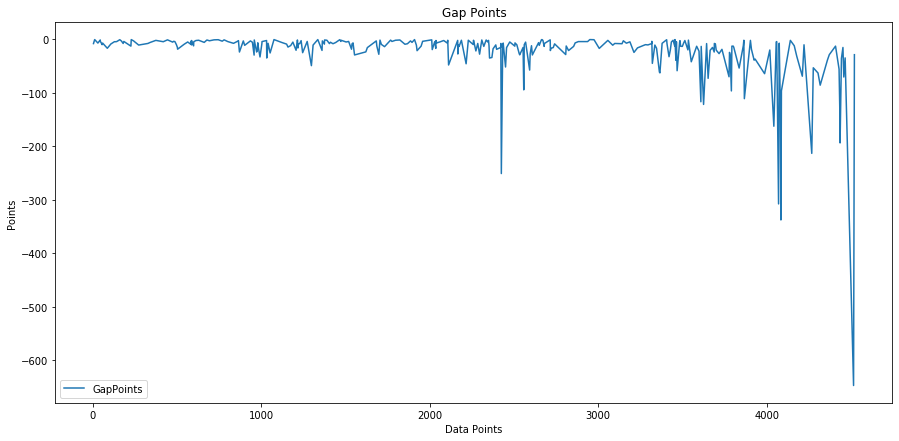

In [21]:
#plotting gap points
plt.figure(figsize=(15,7));
GapDown.GapPoints.plot();
plt.title('Gap Points');
plt.xlabel('Data Points');
plt.ylabel('Points');
plt.legend(loc='best');

### 4) Q- What days we gap down?

In [22]:
GapDown.Time

5      2009-01-07
12     2009-01-14
31     2009-02-02
45     2009-02-16
46     2009-02-17
49     2009-02-20
56     2009-02-27
59     2009-03-02
87     2009-03-30
108    2009-04-20
129    2009-05-11
139    2009-05-21
144    2009-05-26
161    2009-06-12
171    2009-06-22
181    2009-07-02
185    2009-07-06
227    2009-08-17
229    2009-08-19
243    2009-09-02
273    2009-10-02
328    2009-11-26
340    2009-12-08
375    2010-01-12
419    2010-02-25
444    2010-03-22
475    2010-04-22
480    2010-04-27
488    2010-05-05
497    2010-05-14
503    2010-05-20
504    2010-05-21
518    2010-06-04
543    2010-06-29
564    2010-07-20
581    2010-08-06
585    2010-08-10
586    2010-08-11
587    2010-08-12
591    2010-08-16
599    2010-08-24
600    2010-08-25
613    2010-09-07
629    2010-09-23
662    2010-10-26
678    2010-11-11
693    2010-11-26
720    2010-12-23
745    2011-01-17
769    2011-02-10
776    2011-02-17
780    2011-02-21
802    2011-03-15
836    2011-04-18
864    2011-05-16
865    201

### Stock Direction Analysis

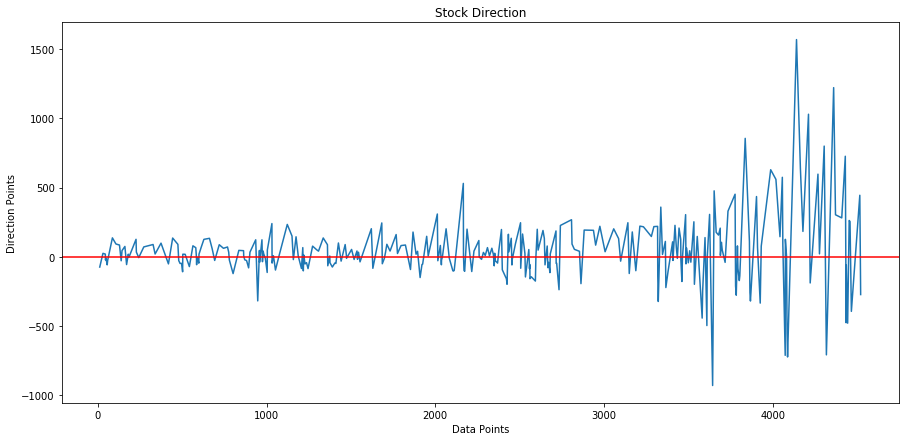

In [23]:
# add new columns to indicates next 15 min observation close
Prev_Last=GapDown.Last.shift(1)
GapDown.insert(8,'Prev_Last',Prev_Last)
Direction=[GapDown.loc[e, 'Last'] - GapDown.loc[e, 'Prev_Last']
        for e in GapDown.index]
GapDown.insert(9,'Direction',Direction)
#plot Direction
plt.figure(figsize=(15,7));
GapDown.Direction.plot();
plt.title('Stock Direction');
plt.xlabel('Data Points');
plt.ylabel('Direction Points');
plt.axhline(y=0,color='red');


### Gap Up Periods

In [24]:
# gap up periods are obtained from having an open ( in 15 min framing) greater than the previous day's high.
GapUp=day_merge_days[day_merge_days['Open'] > day_merge_days['Yesterday_High']]

In [25]:
# proportion of gap down periods in data in days accordong to the whole days
GapUp.shape[0]/day_merge_days.shape[0]

0.164576802507837

In [26]:
GapUp.tail()

,Time,Symbol,Open,Yesterday_High,High,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High
4476,2021-04-05,NQM21,13419.000,13372.250,13615.000,13160.000,13409.250,13577.500,1.090,273637.000,13311.250,13622.250
4484,2021-04-13,NQM21,13877.250,13833.750,13994.000,13732.000,13866.750,13978.250,0.740,380917.000,13775.000,13994.000
4487,2021-04-16,NQM21,14038.750,14034.250,14041.000,13851.500,13953.750,14019.000,-0.210,393796.000,13953.750,14059.500
4500,2021-04-29,NQM21,14042.000,14031.000,14060.750,13878.000,13818.500,13941.500,-0.770,495559.000,13818.500,14064.000
4526,2021-05-25,NQM21,13713.500,13686.000,13738.750,13360.500,13675.750,13700.750,-0.080,42952.000,13606.750,13738.750


#### Which days we gap up?

In [27]:
GapUp.Time

14     2009-01-16
26     2009-01-28
68     2009-03-11
90     2009-04-02
97     2009-04-09
104    2009-04-16
122    2009-05-04
124    2009-05-06
150    2009-06-01
154    2009-06-05
168    2009-06-19
199    2009-07-20
200    2009-07-21
209    2009-07-30
231    2009-08-21
234    2009-08-24
238    2009-08-28
248    2009-09-07
249    2009-09-08
257    2009-09-16
263    2009-09-22
277    2009-10-06
283    2009-10-12
285    2009-10-14
294    2009-10-23
306    2009-11-04
311    2009-11-09
313    2009-11-11
318    2009-11-16
325    2009-11-23
333    2009-12-01
353    2009-12-21
360    2009-12-28
367    2010-01-04
374    2010-01-11
411    2010-02-17
423    2010-03-01
424    2010-03-02
427    2010-03-05
434    2010-03-12
438    2010-03-16
441    2010-03-19
447    2010-03-25
467    2010-04-14
473    2010-04-20
493    2010-05-10
501    2010-05-18
528    2010-06-14
531    2010-06-17
535    2010-06-21
550    2010-07-06
552    2010-07-08
557    2010-07-13
565    2010-07-21
571    2010-07-27
577    201

In [28]:
GapUp.insert(12,'GapPoints',GapUp['Open']-GapUp['Yesterday_High'])
GapUp.GapPoints

14       5.750
26       0.500
68       5.000
90       3.500
97       8.500
104      1.500
122      5.500
124      6.000
150      8.000
154      3.500
168      0.500
199      3.500
200      1.000
209      1.250
231      4.500
234      0.250
238     16.750
248      3.250
249      3.250
257      1.500
263      4.750
277      1.000
283      0.750
285      3.750
294      5.250
306      3.750
311      4.750
313      5.500
318      1.750
325      7.250
333      7.500
353      7.500
360      3.500
367      0.750
374      1.250
411      3.000
423      4.250
424      1.750
427      9.250
434      0.250
438      0.500
441      4.750
447      4.500
467      0.750
473      4.250
493     16.000
501      4.750
528     13.500
531      0.500
535     10.750
550     23.000
552      4.750
557      3.750
565      1.500
571      4.750
577     11.500
584      2.500
598      9.000
607      4.000
609     16.750
612      6.000
615      8.250
619      9.000
630      2.750
649      6.250
651      4.750
661      5

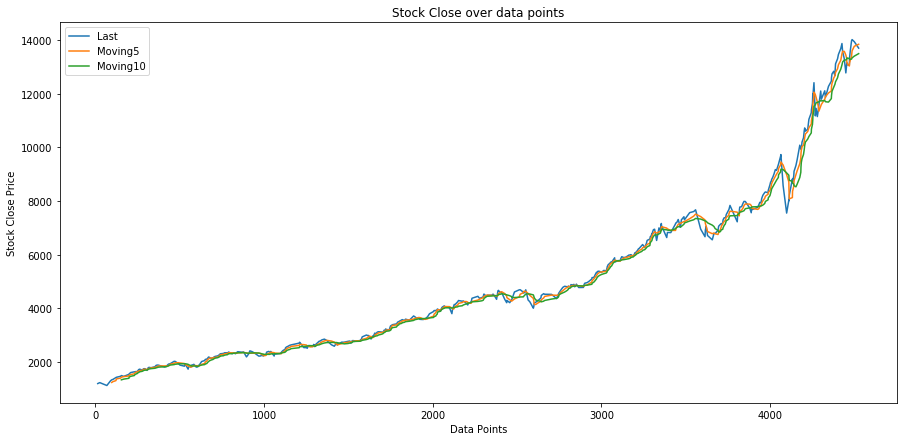

In [29]:
# making a window of 10 and 50 observations
Moving5=GapUp['Last'].rolling(5).mean()
Moving10=GapUp['Last'].rolling(10).mean()
GapUp.insert(5,"Moving5",Moving5)
GapUp.insert(6,"Moving10",Moving10)
#plottig real last values and shifted ones
#warnings.filterwarnings("ignore")
plt.figure(figsize=(15,7));
GapUp['Last'].plot()
GapUp['Moving5'].plot()
GapUp['Moving10'].plot()
plt.title('Stock Close over data points');
plt.xlabel('Data Points');
plt.ylabel('Stock Close Price');
plt.legend(loc='best');

In [30]:
# make a new column represents an uptrend by selecting data points
# which have the fast signal to be greater that the slow signal
# to indicate these value by 1 else 0
UpTrend=[1 if GapUp.loc[i,'Moving5']>GapUp.loc[i,'Moving10'] 
                    else 0 
                    # for each observation
                    for i in GapUp.index
                 ]
#insert this column to gap ddown data frame
GapUp.insert(7,'UpTrend',UpTrend)

In [31]:
# obtain the proportion of uptrending 
GapUp[GapUp['UpTrend']==1].shape[0]/GapUp.shape[0]

0.7752380952380953

> 77.5% of data points in gap down indicate an uptrend of stock price

In [32]:
# add new columns to indicates next 15 min observation close
Prev_Last=GapUp.Last.shift(1)
GapUp.insert(8,'Prev_Last',Prev_Last)
# calculate profit obtained in uptrend case
# put profit to the values subtracted from next close to current close
Direction=[GapUp.loc[e, 'Last'] - GapUp.loc[e, 'Prev_Last']
        # repeat this step for each observation we have
        for e in GapUp.index]
# add new column of profit to gap down data frame
GapUp.insert(9,'Direction',Direction)

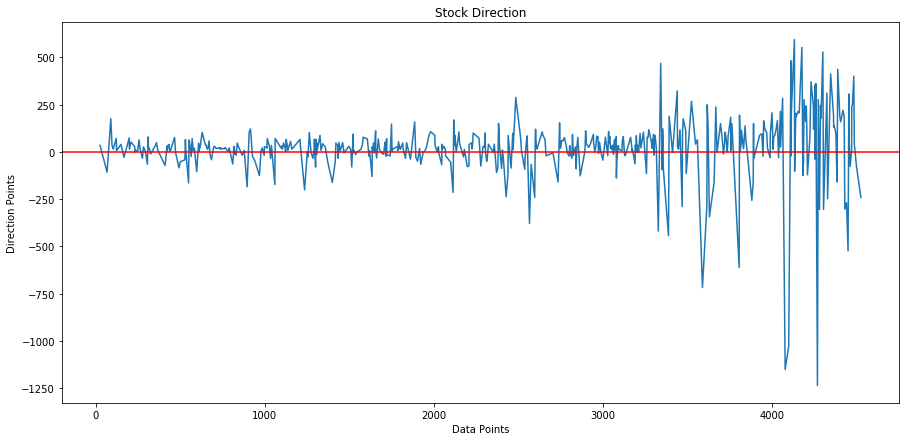

In [33]:
#plot stock direction
plt.figure(figsize=(15,7));
GapUp.Direction.plot();
# perform sum to the profit column
plt.title('Stock Direction');
plt.xlabel('Data Points');
plt.ylabel('Direction Points');
plt.axhline(y=0,color='red');

### Gap Points

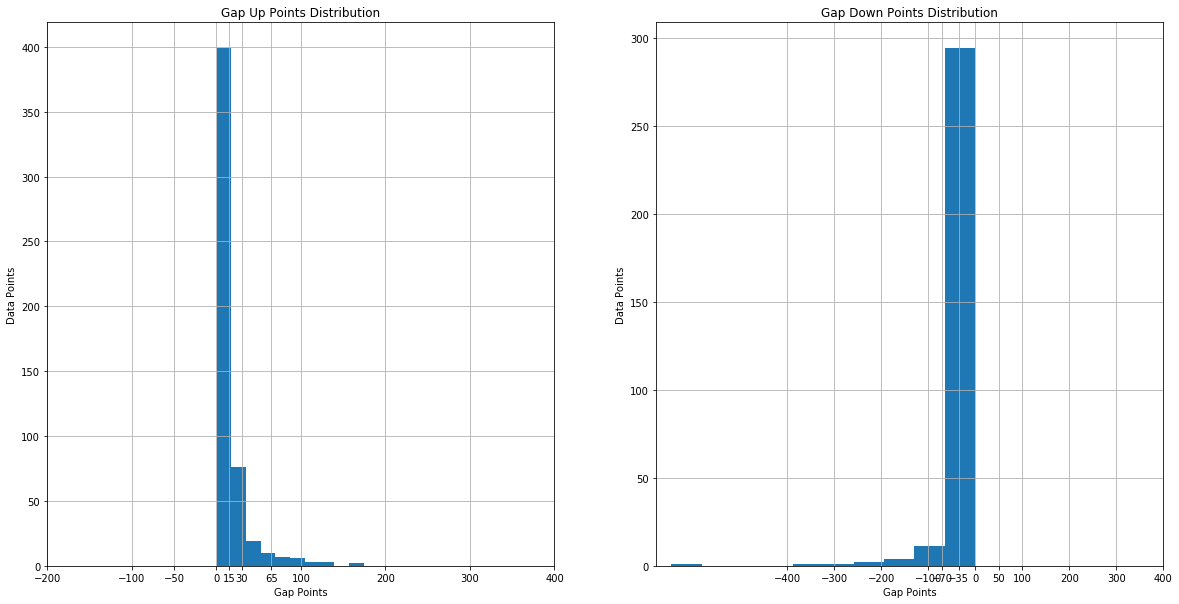

In [34]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
fig1=GapUp.GapPoints.hist();
plt.title('Gap Up Points Distribution');
plt.xlabel('Gap Points');
plt.ylabel('Data Points');
plt.xticks([-200,-100,-50,0,15,30,65,100,200,300,400]);

plt.subplot(1,2,2)
fig2=GapDown.GapPoints.hist();
plt.title('Gap Down Points Distribution');
plt.xlabel('Gap Points');
plt.ylabel('Data Points');
plt.xticks([-400,-300,-200,-100,-70,-35,0,50,100,200,300,400]);

plt.show();


> Its' seen that the majority of gap point lies between [0,15] in gap up periods and between [0,-35] in gap down periods.

## Signal Bar Analysis

In [35]:
# read fifeen framing data frame
fif=pd.read_csv('fifteen.csv',index_col=0)

# shift the data by 1 row below to obtain the previous row of each row 
# to obtain the previous high

prev_high=fif['High'].shift(1)
# previous low
prev_low=fif['Low'].shift(1)
# pervious last
prev_last=fif['Last'].shift(1)

# insert them to the dataframe
fif.insert(2,'Prev_High',prev_high)
fif.insert(4,'Prev_Low',prev_low)
fif.insert(5,'Prev_Last',prev_last)

# drop missing rows resulted from shifting
fif.dropna(inplace=True)

#observe the dataframe after creating the new features
fif.head()

,Time,Symbol,Prev_High,Open,Prev_Low,Prev_Last,High,Low,Last,%Chg,Volume
1,01/02/2009 03:15 AM,NQH09,1214.250,1210.750,1206.500,1210.250,1218.750,1210.500,1217.250,0.570,529.000
2,01/02/2009 03:30 AM,NQH09,1218.750,1217.250,1210.500,1217.250,1218.500,1216.250,1216.750,-0.040,245.000
3,01/02/2009 03:45 AM,NQH09,1218.500,1216.500,1216.250,1216.750,1220.500,1216.500,1218.500,0.140,250.000
4,01/02/2009 04:00 AM,NQH09,1220.500,1218.500,1216.500,1218.500,1220.000,1218.000,1219.250,0.060,156.000
5,01/02/2009 04:15 AM,NQH09,1220.000,1219.000,1218.000,1219.250,1219.750,1216.500,1216.750,-0.200,227.000


In [36]:
# select data with one time frame up and down and signal bar up and down

# one time frame up is obtained according to the conditions of having current low to be greater than the previous low and
# the current last to be greater than the previous low as well
OTF_up=fif[(fif['Low']>fif['Prev_Low']) & (fif['Last']>fif['Prev_Low']) ]

# one time frame down is obtained according to the conditions of having current high to be lower than the previous high and
# the current last to be lower than the previous high as well
OTF_down=fif[(fif['High']<fif['Prev_High']) & (fif['Last']<fif['Prev_High']) ]


In [37]:
# signal bar up is obtained according to the conditions of having the current last to be greater than the previous high
Signal_up=fif[fif['Last']>fif['Prev_High']]

# signal bar down is obtained according to the conditions of having the current last to be lowe than the previous low
Signal_down=fif[fif['Last']<fif['Prev_Low']]

In [38]:
# proportion og OTF up to the data frame size
OTF_up.shape[0]/fif.shape[0],OTF_down.shape[0]/fif.shape[0]

(0.5017252256538763, 0.47306075120448593)

In [39]:
Signal_up.shape[0]/fif.shape[0],Signal_down.shape[0]/fif.shape[0]

(0.23822564330298768, 0.21491130683640491)

In [40]:
# create a new column to be assigned to 1 if the dataframe has otf_up,-1 if otf_down and 0 if one on the conditions of the one time frame was violated
OTF=[1 if (fif.loc[i,'Low']>fif.loc[i,'Prev_Low']) & (fif.loc[i,'Last']>fif.loc[i,'Prev_Low'])

                    else -1 if (fif.loc[i,'High']<fif.loc[i,'Prev_High']) & (fif.loc[i,'Last']<fif.loc[i,'Prev_High'])
                    
            
                    else 0
     # for each observation
                    for i in fif.index
                 ]
# create another columns similar to the column above but here indicating signal bars, to have 1 if the dataframe 
# has sb up , -1 if sb down and 0 if one on the conditions of the one time frame was violated
Signal_Bar=[1 if fif.loc[i,'Last']>fif.loc[i,'Prev_High']
            
            
                    else -1 if fif.loc[i,'Last']<fif.loc[i,'Prev_Low']
                    
            
                    else 0
            # for each observation
                    for i in fif.index
                 ]

In [41]:
# insert these new columns to the fif_recent dataframe
fif.insert(10,'OTF',OTF)
fif.insert(11,'Signal_Bar',Signal_Bar)


In [42]:
# observe the end result
fif.head(10)

,Time,Symbol,Prev_High,Open,Prev_Low,Prev_Last,High,Low,Last,%Chg,OTF,Signal_Bar,Volume
1,01/02/2009 03:15 AM,NQH09,1214.250,1210.750,1206.500,1210.250,1218.750,1210.500,1217.250,0.570,1,1,529.000
2,01/02/2009 03:30 AM,NQH09,1218.750,1217.250,1210.500,1217.250,1218.500,1216.250,1216.750,-0.040,1,0,245.000
3,01/02/2009 03:45 AM,NQH09,1218.500,1216.500,1216.250,1216.750,1220.500,1216.500,1218.500,0.140,1,0,250.000
4,01/02/2009 04:00 AM,NQH09,1220.500,1218.500,1216.500,1218.500,1220.000,1218.000,1219.250,0.060,1,0,156.000
5,01/02/2009 04:15 AM,NQH09,1220.000,1219.000,1218.000,1219.250,1219.750,1216.500,1216.750,-0.200,-1,-1,227.000
6,01/02/2009 04:30 AM,NQH09,1219.750,1217.000,1216.500,1216.750,1217.500,1215.500,1215.500,-0.100,-1,-1,81.000
7,01/02/2009 04:45 AM,NQH09,1217.500,1215.500,1215.500,1215.500,1217.750,1215.500,1217.000,0.120,0,0,55.000
8,01/02/2009 05:00 AM,NQH09,1217.750,1217.000,1215.500,1217.000,1217.250,1209.250,1210.000,-0.560,-1,-1,837.000
9,01/02/2009 05:15 AM,NQH09,1217.250,1209.500,1209.250,1210.000,1210.000,1204.250,1205.000,-0.400,-1,-1,1060.000
10,01/02/2009 05:30 AM,NQH09,1210.000,1205.000,1204.250,1205.000,1208.000,1204.000,1207.250,0.180,-1,0,983.000


In [43]:
fif.tail(100)

,Time,Symbol,Prev_High,Open,Prev_Low,Prev_Last,High,Low,Last,%Chg,OTF,Signal_Bar,Volume
435302,06/02/2021 12:30 PM,NQM21,13672.500,13667.000,13652.500,13667.000,13673.500,13662.000,13667.500,0.020,1,0,2310.000
435303,06/02/2021 12:45 PM,NQM21,13673.500,13668.000,13662.000,13667.500,13672.000,13662.500,13670.250,0.030,1,0,2064.000
435304,06/02/2021 01:00 PM,NQM21,13672.000,13670.500,13662.500,13670.250,13676.500,13663.250,13665.000,-0.050,1,0,3397.000
435305,06/02/2021 01:15 PM,NQM21,13676.500,13665.500,13663.250,13665.000,13670.250,13663.250,13667.500,0.010,-1,0,2838.000
435306,06/02/2021 01:30 PM,NQM21,13670.250,13667.000,13663.250,13667.500,13688.000,13651.750,13682.500,0.120,0,1,32281.000
435307,06/02/2021 01:45 PM,NQM21,13688.000,13682.750,13651.750,13682.500,13708.500,13677.750,13679.000,-0.030,1,0,21294.000
435308,06/02/2021 02:00 PM,NQM21,13708.500,13679.000,13677.750,13679.000,13688.750,13657.500,13667.000,-0.090,-1,-1,20782.000
435309,06/02/2021 02:15 PM,NQM21,13688.750,13667.000,13657.500,13667.000,13701.500,13665.750,13699.000,0.230,1,1,15325.000
435310,06/02/2021 02:30 PM,NQM21,13701.500,13698.750,13665.750,13699.000,13712.750,13688.750,13703.000,0.040,1,1,13981.000
435311,06/02/2021 02:45 PM,NQM21,13712.750,13703.000,13688.750,13703.000,13710.250,13674.250,13684.250,-0.120,-1,-1,12347.000


### Q. How far we go in OTF?

### Q. How far we go  before the start of OTF?

### 3.2) Stock direction in signal bar up periods?

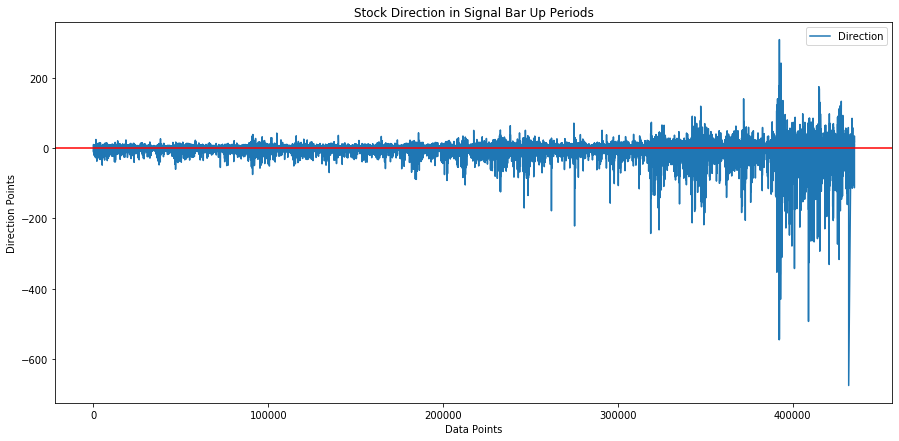

In [44]:
# select data with signal bar up
Signal_Up=fif[fif['Signal_Bar']==1]
Signal_Up.shape[0]
# create a new column for next last for each row
Next_Last=Signal_Up['Last'].shift(-1)
# insert it into the dataframe
Signal_Up.insert(8,'Next_Last',Next_Last)
# calculate the direction by subtract the current last from the next last for each row and create a new column called profit
Direction=[Signal_Up.loc[i,'Next_Last'] - Signal_Up.loc[i,'Last'] for i in Signal_Up.index]
# insert this column into the dataframe
Signal_Up.insert(9,'Direction',Direction)
#plot Direction
plt.figure(figsize=(15,7));
Signal_Up['Direction'].plot();
plt.title('Stock Direction in Signal Bar Up Periods');
plt.xlabel('Data Points');
plt.ylabel('Direction Points');
plt.legend();
plt.axhline(y=0,color='red');

### 3.2) Stock direction in signal bar down periods?

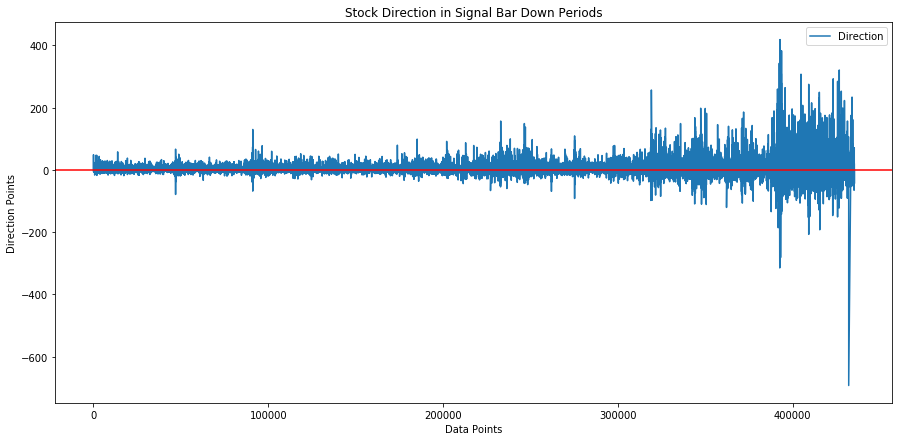

In [45]:
# select data with signal bar up
Signal_Down=fif[fif['Signal_Bar']==-1]
Signal_Down.shape[0]
# create a new column for next last for each row
Next_Last=Signal_Down['Last'].shift(-1)
# insert it into the dataframe
Signal_Down.insert(8,'Next_Last',Next_Last)
# calculate the direction by subtract the current last from the next last for each row and create a new column called profit
Direction=[Signal_Down.loc[i,'Next_Last'] - Signal_Down.loc[i,'Last'] for i in Signal_Down.index]
# insert this column into the dataframe
Signal_Down.insert(9,'Direction',Direction)
#plot Direction
plt.figure(figsize=(15,7));
Signal_Down['Direction'].plot();
plt.title('Stock Direction in Signal Bar Down Periods');
plt.xlabel('Data Points');
plt.ylabel('Direction Points');
plt.legend();
plt.axhline(y=0,color='red');

## Profit Calculation

>  we need to select periods where there are gap periods,then to select signal bars,at last to compare stock price hence we have our profit value

> at first we select signal bars from gap up periods

In [46]:
GapUp.head()

,Time,Symbol,Open,Yesterday_High,High,Moving5,Moving10,UpTrend,Prev_Last,Direction,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High,GapPoints
14,2009-01-16,NQH09,1197.750,1192.000,1200.500,nan,nan,0,nan,nan,1138.500,1164.500,1197.250,-0.060,288416.000,1164.500,1201.000,5.750
26,2009-01-28,NQH09,1210.500,1210.000,1244.750,nan,nan,0,1197.250,35.000,1176.250,1209.750,1232.250,1.760,300358.000,1206.250,1244.750,0.500
68,2009-03-11,NQH09,1121.250,1116.250,1135.750,nan,nan,0,1232.250,-107.250,1054.250,1106.250,1125.000,0.510,372232.000,1105.000,1135.750,5.000
90,2009-04-02,NQM09,1272.500,1269.000,1310.750,nan,nan,0,1125.000,176.000,1210.000,1268.000,1301.000,2.210,392364.000,1263.000,1310.750,3.500
97,2009-04-09,NQM09,1321.500,1313.000,1341.250,1238.500,nan,0,1301.000,36.000,1267.250,1317.250,1337.000,1.150,238592.000,1300.750,1341.250,8.500


In [47]:
GapUp.tail()

,Time,Symbol,Open,Yesterday_High,High,Moving5,Moving10,UpTrend,Prev_Last,Direction,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High,GapPoints
4476,2021-04-05,NQM21,13419.000,13372.250,13615.000,13244.250,13282.200,0,13325.750,251.750,13160.000,13409.250,13577.500,1.090,273637.000,13311.250,13622.250,46.750
4484,2021-04-13,NQM21,13877.250,13833.750,13994.000,13408.950,13292.825,1,13577.500,400.750,13732.000,13866.750,13978.250,0.740,380917.000,13775.000,13994.000,43.500
4487,2021-04-16,NQM21,14038.750,14034.250,14041.000,13597.150,13337.825,1,13978.250,40.750,13851.500,13953.750,14019.000,-0.210,393796.000,13953.750,14059.500,4.500
4500,2021-04-29,NQM21,14042.000,14031.000,14060.750,13768.400,13402.000,1,14019.000,-77.500,13878.000,13818.500,13941.500,-0.770,495559.000,13818.500,14064.000,11.000
4526,2021-05-25,NQM21,13713.500,13686.000,13738.750,13843.400,13494.400,1,13941.500,-240.750,13360.500,13675.750,13700.750,-0.080,42952.000,13606.750,13738.750,27.500


In [48]:
Signal_Bar=[1 if GapUp.loc[i,'Last']>GapUp.loc[i,'Yesterday_High']
            
            
                    else -1 if GapUp.loc[i,'Last']<GapUp.loc[i,'Yesterday_Low']
                    
            
                    else 0
            # for each observation
                    for i in GapUp.index
                 ]
GapUp.insert(18,'Signal_Bar',Signal_Bar)

In [49]:
GapUp.Signal_Bar.head(1000)

14      1
26      1
68      1
90      1
97      1
104     1
122     1
124     1
150     1
154     0
168     1
199     1
200     1
209     0
231     1
234     0
238     0
248     1
249     1
257     1
263     0
277     1
283     0
285     1
294     0
306     1
311     1
313     1
318     1
325     1
333     1
353     1
360     1
367     1
374     0
411     1
423     1
424     1
427     1
434     0
438     1
441     0
447     0
467     1
473     1
493     1
501     0
528     0
531     0
535    -1
550     1
552     1
557     1
565     0
571     0
577     1
584     1
598     0
607     1
609     1
612     0
615     0
619     1
630     1
649     1
651     1
661     1
664     1
671     1
676     0
685     1
698     1
704     0
710     0
725     0
731     1
735     0
739     0
740     1
760     1
766     1
784     1
787     1
790     1
811     1
819     0
824     0
831     1
838     1
844     1
867     1
879     1
896     0
908     1
916     1
928     1
941     0
969     1
978     1
985     1


In [50]:
GapUp[GapUp['Signal_Bar']==-1]

,Time,Symbol,Open,Yesterday_High,High,Moving5,Moving10,UpTrend,Prev_Last,Direction,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High,GapPoints,Signal_Bar
535,2010-06-21,NQU10,1935.500,1924.750,1938.750,1896.250,1934.025,0,1910.750,-11.750,1905.000,1883.750,1899.000,-1.920,295857.000,1883.750,1941.000,10.750,-1
1256,2012-06-11,NQU12,2571.250,2564.250,2573.500,2605.650,2594.625,1,2536.750,-26.000,2517.750,2508.250,2510.750,-2.420,215202.000,2506.000,2587.500,7.000,-1
1285,2012-07-10,NQU12,2618.000,2615.500,2625.500,2570.250,2609.625,0,2612.000,-34.000,2591.500,2568.500,2578.000,-1.570,212124.000,2568.500,2625.500,2.500,-1
1307,2012-08-01,NQU12,2655.500,2652.500,2656.250,2617.550,2593.900,1,2642.000,-14.750,2630.000,2618.500,2627.250,-1.110,214811.000,2618.500,2656.250,3.000,-1
1372,2012-10-05,NQZ12,2835.500,2830.000,2840.750,2808.500,2724.750,1,2853.500,-49.250,2807.750,2799.750,2804.250,-1.110,176958.000,2799.750,2840.750,5.500,-1
1515,2013-02-25,NQH13,2756.000,2739.000,2764.500,2746.850,2716.225,1,2782.000,-80.000,2714.250,2700.750,2702.000,-1.940,334593.000,2691.750,2764.500,17.000,-1
1722,2013-09-20,NQZ13,3238.500,3237.750,3241.500,3185.950,3145.450,1,3231.750,-14.000,3224.750,3217.250,3217.750,-0.670,180131.000,3217.250,3241.500,0.750,-1
1904,2014-03-21,NQM14,3707.750,3701.250,3710.000,3640.300,3592.225,1,3688.500,-49.250,3657.250,3633.750,3639.250,-1.840,340413.000,3633.750,3712.750,6.500,-1
2070,2014-09-03,NQU14,4105.000,4100.750,4105.500,4068.550,4016.250,1,4092.000,-20.250,4077.750,4062.500,4071.750,-0.790,221152.000,4062.500,4113.750,4.250,-1
2540,2015-12-17,NQH16,4680.750,4669.750,4682.000,4633.650,4452.775,1,4602.750,-34.250,4575.000,4567.000,4568.500,-2.450,262696.000,4547.000,4683.750,11.000,-1


> Then in Gap Down periods

In [51]:
Signal_Bar=[1 if GapDown.loc[i,'Last']>GapDown.loc[i,'Yesterday_High']
            
            
                    else -1 if GapDown.loc[i,'Last']<GapDown.loc[i,'Yesterday_Low']
                    
            
                    else 0
            # for each observation
                    for i in GapDown.index
                 ]

GapDown.insert(18,'Signal_Bar',Signal_Bar)

## First Signal Bar

### Q- How soon the first signal bar comes in?

In [52]:
GapUp[['Time','Signal_Bar']].head()

,Time,Signal_Bar
14,2009-01-16,1
26,2009-01-28,1
68,2009-03-11,1
90,2009-04-02,1
97,2009-04-09,1


### Q- What is the H|L of the day?

In [53]:
days_min_max=days_min_max.set_index('Time')

In [54]:
days_min_max.loc['2009-01-16']

Day_Low    1164.500
Day_High   1201.000
Name: 2009-01-16 00:00:00, dtype: float64

### Q- when will the first signal bar be reversed?

In [55]:
GapUp[GapUp['Signal_Bar']==-1].head(1)

,Time,Symbol,Open,Yesterday_High,High,Moving5,Moving10,UpTrend,Prev_Last,Direction,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High,GapPoints,Signal_Bar
535,2010-06-21,NQU10,1935.500,1924.750,1938.750,1896.250,1934.025,0,1910.750,-11.750,1905.000,1883.750,1899.000,-1.920,295857.000,1883.750,1941.000,10.750,-1


In [56]:
days_min_max.loc['2010-06-21']

Day_Low    1883.750
Day_High   1941.000
Name: 2010-06-21 00:00:00, dtype: float64

In [57]:
GapUp=GapUp.set_index('Time')
print(GapUp['2010-06-21':'2009-01-16'].shape[0])


0


In [58]:
GapUp.loc['2009-01-16':'2010-06-21'].shape[0]

50

> After 50 days in gap up periods, the first signal bar is reversed.

In [59]:
GapUp=GapUp.reset_index()

### Q- What is distance between signal bars?

> find the distance between signal bars in both of gap up and down periods

In [60]:
# here is the signal bar column derived above
GapUp.Signal_Bar

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     0
16     0
17     1
18     1
19     1
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     0
35     1
36     1
37     1
38     1
39     0
40     1
41     0
42     0
43     1
44     1
45     1
46     0
47     0
48     0
49    -1
50     1
51     1
52     1
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     0
61     0
62     1
63     1
64     1
65     1
66     1
67     1
68     1
69     0
70     1
71     1
72     0
73     0
74     0
75     1
76     0
77     0
78     1
79     1
80     1
81     1
82     1
83     1
84     1
85     0
86     0
87     1
88     1
89     1
90     1
91     1
92     0
93     1
94     1
95     1
96     0
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    1
110    1
1

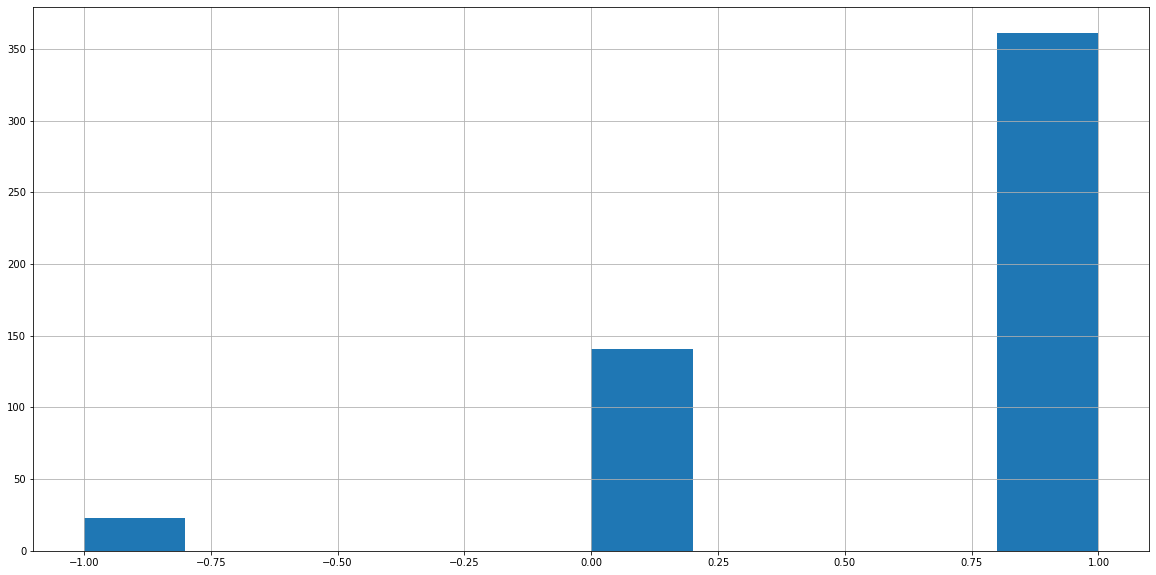

In [61]:
plt.figure(figsize=(20,10))
GapUp['Signal_Bar'].hist();

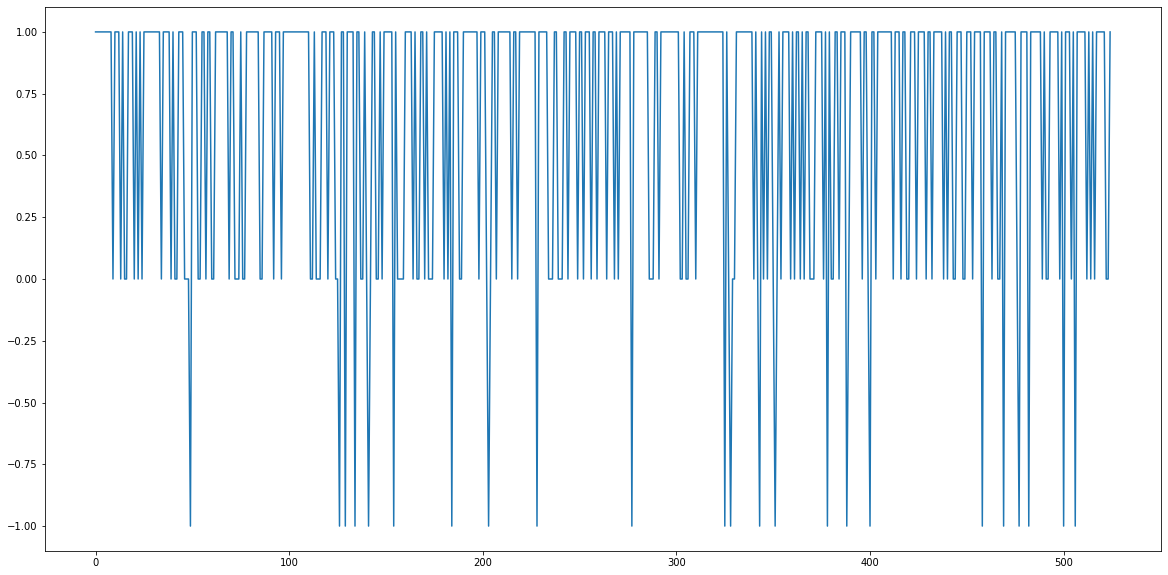

In [62]:
plt.figure(figsize=(20,10))
GapUp['Signal_Bar'].plot();

In [63]:
def SB_count(df):
    SB_count=pd.DataFrame()
    cu=0
    cd=0
    for i in range(len(df)):
        if df[i]==1:
            SB_count[i]=["SBU"+str(cu+1)]
            cu+=1
        elif df[i]==-1:   
            SB_count[i]=["SBD"+str(cd+1)]
            cd+=1
        else:
            df[i]=["NAN"]
    return SB_count.T

In [64]:
SB_count(GapUp.Signal_Bar)

/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,0
0,SBU1
1,SBU2
2,SBU3
3,SBU4
4,SBU5
5,SBU6
6,SBU7
7,SBU8
8,SBU9
10,SBU10


In [65]:
#TO MERGE BETWEEEN THE ORIGINAL DF
GapUp['SB']=SB_count(GapUp.Signal_Bar)
GapUp.head()

,Time,Symbol,Open,Yesterday_High,High,Moving5,Moving10,UpTrend,Prev_Last,Direction,Yesterday_Low,Low,Last,%Chg,Volume,Day_Low,Day_High,GapPoints,Signal_Bar,SB
0,2009-01-16,NQH09,1197.750,1192.000,1200.500,nan,nan,0,nan,nan,1138.500,1164.500,1197.250,-0.060,288416.000,1164.500,1201.000,5.750,1,SBU1
1,2009-01-28,NQH09,1210.500,1210.000,1244.750,nan,nan,0,1197.250,35.000,1176.250,1209.750,1232.250,1.760,300358.000,1206.250,1244.750,0.500,1,SBU2
2,2009-03-11,NQH09,1121.250,1116.250,1135.750,nan,nan,0,1232.250,-107.250,1054.250,1106.250,1125.000,0.510,372232.000,1105.000,1135.750,5.000,1,SBU3
3,2009-04-02,NQM09,1272.500,1269.000,1310.750,nan,nan,0,1125.000,176.000,1210.000,1268.000,1301.000,2.210,392364.000,1263.000,1310.750,3.500,1,SBU4
4,2009-04-09,NQM09,1321.500,1313.000,1341.250,1238.500,nan,0,1301.000,36.000,1267.250,1317.250,1337.000,1.150,238592.000,1300.750,1341.250,8.500,1,SBU5


In [66]:
GapDown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 5 to 4520
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            314 non-null    datetime64[ns]
 1   Symbol          314 non-null    object        
 2   Open            314 non-null    float64       
 3   Yesterday_High  314 non-null    float64       
 4   High            314 non-null    float64       
 5   Moving5         310 non-null    float64       
 6   Moving10        305 non-null    float64       
 7   UpTrend         314 non-null    int64         
 8   Prev_Last       313 non-null    float64       
 9   Direction       313 non-null    float64       
 10  Yesterday_Low   314 non-null    float64       
 11  Low             314 non-null    float64       
 12  Last            314 non-null    float64       
 13  %Chg            314 non-null    float64       
 14  Volume          314 non-null    float64       
 15  Day_L

In [67]:
#SB_count(GapDown.Signal_Bar)

In [68]:
GapDown.Signal_Bar

5      -1
12     -1
31      0
45     -1
46     -1
49      0
56     -1
59     -1
87     -1
108    -1
129     0
139    -1
144     1
161    -1
171    -1
181    -1
185     0
227    -1
229     1
243     0
273    -1
328    -1
340    -1
375    -1
419     0
444     0
475     0
480    -1
488     0
497    -1
503    -1
504     0
518    -1
543    -1
564     1
581     0
585    -1
586    -1
587     0
591     0
599    -1
600     0
613    -1
629     0
662     0
678     0
693    -1
720     0
745    -1
769     0
776     0
780    -1
802     0
836     0
864    -1
865     0
871    -1
882    -1
894    -1
902     0
936    -1
948    -1
958    -1
959    -1
973    -1
976    -1
980    -1
983     0
993    -1
1004   -1
1005    0
1032   -1
1033   -1
1041   -1
1053   -1
1076   -1
1123    0
1151    1
1159   -1
1175    0
1188   -1
1207   -1
1215    0
1216    0
1218   -1
1221    0
1228   -1
1237    0
1246   -1
1273   -1
1298   -1
1308    0
1336   -1
1361   -1
1363   -1
1375   -1
1376   -1
1390   -1
1405   -1
1411   -1


In [69]:
GapDown.Signal_Bar.shape[0]

314

In [70]:
GapDown[GapDown['Signal_Bar']==1].shape[0]

15

In [71]:
GapDown[GapDown['Signal_Bar']==1].shape[0]/GapDown.shape[0]

0.04777070063694268

#  Day Night Comparison

>If we open in a day, how often does the price revisit the high of overnight?

In [72]:

night_days=pd.read_csv('night_days.csv',index_col=0)
night_days.head()


,Time,Symbol,Open,High,Low,Last,%Chg,Volume
0,2009-01-02,NQH09,1209.250,1220.500,1204.000,1211.500,0.220,7596.000
1,2009-01-03,NaN,nan,nan,nan,nan,0.000,0.000
2,2009-01-04,NQH09,1251.750,1254.250,1244.250,1253.750,0.140,1424.000
3,2009-01-05,NQH09,1253.750,1270.000,1244.250,1268.000,0.380,14179.000
4,2009-01-06,NQH09,1268.250,1281.250,1260.750,1265.250,-0.020,13664.000


In [73]:
# make a new data frame called nights_min_max in which we obtained the low and the high of the night
nights_min_max=night_days[['Time','Low','High']]
# rename these column so that we can merge with no overlappong in columns name
nights_min_max=nights_min_max[['Time','Low','High']].rename(columns={"Low":"Night_Low","High":"Night_High"})
# convert this column to date data type to be identical with the previous 'Time' column
nights_min_max['Time']=pd.to_datetime(nights_min_max['Time'],errors='coerce').dt.date
# observe the result
nights_min_max.head()

,Time,Night_Low,Night_High
0,2009-01-02,1204.000,1220.500
1,2009-01-03,nan,nan
2,2009-01-04,1244.250,1254.250
3,2009-01-05,1244.250,1270.000
4,2009-01-06,1260.750,1281.250


In [74]:
fifteen_day=pd.read_csv('fifteen_day.csv',index_col=0)
fifteen_day.head()

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
0,01/02/2009 06:30 AM,NQH09,1211.500,1217.500,1208.250,1214.750,0.280,11633.000
1,01/02/2009 06:45 AM,NQH09,1214.750,1217.500,1210.000,1213.000,-0.140,5638.000
2,01/02/2009 07:00 AM,NQH09,1213.000,1219.000,1211.000,1218.000,0.400,7657.000
3,01/02/2009 07:15 AM,NQH09,1218.250,1222.000,1216.750,1221.500,0.280,4934.000
4,01/02/2009 07:30 AM,NQH09,1221.500,1233.750,1221.250,1231.500,0.800,8613.000


In [75]:
# convert this column to date data type to be identical with the previous 'Time' column
fifteen_day['Time']=pd.to_datetime(fifteen_day['Time'],errors='coerce').dt.date
# observe the result
fifteen_day.head()

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
0,2009-01-02,NQH09,1211.500,1217.500,1208.250,1214.750,0.280,11633.000
1,2009-01-02,NQH09,1214.750,1217.500,1210.000,1213.000,-0.140,5638.000
2,2009-01-02,NQH09,1213.000,1219.000,1211.000,1218.000,0.400,7657.000
3,2009-01-02,NQH09,1218.250,1222.000,1216.750,1221.500,0.280,4934.000
4,2009-01-02,NQH09,1221.500,1233.750,1221.250,1231.500,0.800,8613.000


In [76]:
Night_Comp=pd.merge(fifteen_day,nights_min_max , on='Time', how='outer').dropna()
Night_Comp.head(1000)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Night_Low,Night_High
0,2009-01-02,NQH09,1211.500,1217.500,1208.250,1214.750,0.280,11633.000,1204.000,1220.500
1,2009-01-02,NQH09,1214.750,1217.500,1210.000,1213.000,-0.140,5638.000,1204.000,1220.500
2,2009-01-02,NQH09,1213.000,1219.000,1211.000,1218.000,0.400,7657.000,1204.000,1220.500
3,2009-01-02,NQH09,1218.250,1222.000,1216.750,1221.500,0.280,4934.000,1204.000,1220.500
4,2009-01-02,NQH09,1221.500,1233.750,1221.250,1231.500,0.800,8613.000,1204.000,1220.500
5,2009-01-02,NQH09,1230.500,1236.750,1230.000,1235.500,0.320,8658.000,1204.000,1220.500
6,2009-01-02,NQH09,1235.750,1236.500,1232.000,1233.750,-0.140,5424.000,1204.000,1220.500
7,2009-01-02,NQH09,1234.000,1236.250,1232.000,1235.750,0.160,3874.000,1204.000,1220.500
8,2009-01-02,NQH09,1236.000,1240.500,1234.750,1239.000,0.260,9198.000,1204.000,1220.500
9,2009-01-02,NQH09,1239.000,1240.000,1237.000,1238.500,-0.040,5266.000,1204.000,1220.500


In [77]:
# shift down by 27 observaions ( the number of records till the next night)
# to have the previous low and high of the night
# then to create two new columns into the merged data frame.
Pre_Night_Low=Night_Comp['Night_Low'].shift(27)
Night_Comp.insert(9,'Pre_Night_Low',Pre_Night_Low)
Pre_Night_High=Night_Comp['Night_High'].shift(27)
Night_Comp.insert(10,'Pre_Night_High',Pre_Night_High)

Night_Comp.head(200)

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Night_Low,Pre_Night_Low,Pre_Night_High,Night_High
0,2009-01-02,NQH09,1211.500,1217.500,1208.250,1214.750,0.280,11633.000,1204.000,nan,nan,1220.500
1,2009-01-02,NQH09,1214.750,1217.500,1210.000,1213.000,-0.140,5638.000,1204.000,nan,nan,1220.500
2,2009-01-02,NQH09,1213.000,1219.000,1211.000,1218.000,0.400,7657.000,1204.000,nan,nan,1220.500
3,2009-01-02,NQH09,1218.250,1222.000,1216.750,1221.500,0.280,4934.000,1204.000,nan,nan,1220.500
4,2009-01-02,NQH09,1221.500,1233.750,1221.250,1231.500,0.800,8613.000,1204.000,nan,nan,1220.500
5,2009-01-02,NQH09,1230.500,1236.750,1230.000,1235.500,0.320,8658.000,1204.000,nan,nan,1220.500
6,2009-01-02,NQH09,1235.750,1236.500,1232.000,1233.750,-0.140,5424.000,1204.000,nan,nan,1220.500
7,2009-01-02,NQH09,1234.000,1236.250,1232.000,1235.750,0.160,3874.000,1204.000,nan,nan,1220.500
8,2009-01-02,NQH09,1236.000,1240.500,1234.750,1239.000,0.260,9198.000,1204.000,nan,nan,1220.500
9,2009-01-02,NQH09,1239.000,1240.000,1237.000,1238.500,-0.040,5266.000,1204.000,nan,nan,1220.500


In [78]:
# remove null values obtained from incompatible dates.
day_merge_days.dropna(inplace=True)

In [79]:
Night_Comp[Night_Comp['Open']==Night_Comp['Pre_Night_High']]

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Night_Low,Pre_Night_Low,Pre_Night_High,Night_High
1366,2009-01-16,NQH09,1192.000,1197.000,1187.250,1194.500,0.200,10081.000,1183.500,1138.500,1192.000,1201.000
2408,2009-01-27,NQH09,1194.500,1195.500,1188.000,1190.000,-0.360,6339.000,1176.250,1153.500,1194.500,1210.000
5280,2009-02-26,NQH09,1168.250,1169.000,1155.500,1160.000,-0.700,21465.000,1126.250,1152.500,1168.250,1173.750
6542,2009-03-11,NQH09,1116.250,1120.000,1116.000,1119.750,0.300,7854.000,1105.000,1054.250,1116.250,1125.750
7301,2009-03-19,NQM09,1213.500,1214.000,1205.750,1207.750,-0.470,9544.000,1193.000,1183.000,1213.500,1222.750
9994,2009-04-16,NQM09,1331.750,1335.750,1331.000,1334.750,0.210,5703.000,1307.250,1305.500,1331.750,1351.750
10757,2009-04-24,NQM09,1356.000,1363.500,1354.750,1361.000,0.390,10873.000,1337.000,1333.250,1356.000,1357.250
11232,2009-04-29,NQM09,1370.500,1374.250,1368.250,1372.750,0.190,20544.000,1365.000,1351.000,1370.500,1389.000
13826,2009-05-26,NQM09,1379.250,1405.000,1379.250,1399.500,1.470,48944.000,1342.750,1367.250,1379.250,1415.000
15169,2009-06-09,NQM09,1498.250,1502.250,1495.500,1496.250,-0.160,12502.000,1488.750,1476.500,1498.250,1513.750


In [80]:
Night_Comp[Night_Comp['Open']==Night_Comp['Pre_Night_High']].shape[0]

329

In [81]:

Night_Comp['Open'].shape[0]

84768

In [82]:
Night_Comp[Night_Comp['Open']==Night_Comp['Pre_Night_High']].shape[0]/Night_Comp['Open'].shape[0]

0.0038811815779539447

In [83]:
#sample the Open and Pre_Night_High column to simulate the whole population
#IN PROGRESS

In [84]:
Night_Comp[Night_Comp['Open']==Night_Comp['Pre_Night_Low']]

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Night_Low,Pre_Night_Low,Pre_Night_High,Night_High
685,2009-01-09,NQH09,1226.000,1227.750,1225.500,1226.500,0.040,3444.000,1238.250,1226.000,1254.500,1256.250
1068,2009-01-13,NQH09,1205.500,1207.750,1202.500,1203.000,-0.200,4752.000,1190.250,1205.500,1226.000,1210.750
2612,2009-01-29,NQH09,1206.250,1209.500,1204.000,1207.750,0.130,8663.000,1200.750,1206.250,1231.250,1230.000
3002,2009-02-02,NQH09,1193.500,1194.000,1187.750,1189.500,-0.280,9799.000,1153.500,1193.500,1214.000,1200.250
3941,2009-02-12,NQH09,1218.000,1224.250,1217.750,1220.250,0.160,16338.000,1205.500,1218.000,1239.750,1251.500
5297,2009-02-26,NQH09,1152.500,1154.000,1149.250,1150.500,-0.180,8438.000,1126.250,1152.500,1168.250,1173.750
5396,2009-02-27,NQH09,1126.250,1130.000,1122.750,1126.250,0.020,11141.000,1107.250,1126.250,1173.750,1138.000
9912,2009-04-15,NQM09,1304.250,1310.000,1302.000,1307.500,0.250,13877.000,1305.500,1304.250,1341.000,1331.750
12491,2009-05-12,NQM09,1366.000,1366.750,1361.000,1363.750,-0.150,21606.000,1377.250,1366.000,1397.000,1406.500
15275,2009-06-10,NQM09,1488.750,1491.500,1486.750,1488.500,0.010,9928.000,1494.500,1488.750,1513.750,1517.750


In [85]:
Night_Comp[Night_Comp['Open']==Night_Comp['Pre_Night_Low']].shape[0]

188

In [86]:
Night_Comp[(Night_Comp['Open']==Night_Comp['Pre_Night_High'])|(Night_Comp['Open']==Night_Comp['Pre_Night_Low'])]

,Time,Symbol,Open,High,Low,Last,%Chg,Volume,Night_Low,Pre_Night_Low,Pre_Night_High,Night_High
685,2009-01-09,NQH09,1226.000,1227.750,1225.500,1226.500,0.040,3444.000,1238.250,1226.000,1254.500,1256.250
1068,2009-01-13,NQH09,1205.500,1207.750,1202.500,1203.000,-0.200,4752.000,1190.250,1205.500,1226.000,1210.750
1366,2009-01-16,NQH09,1192.000,1197.000,1187.250,1194.500,0.200,10081.000,1183.500,1138.500,1192.000,1201.000
2408,2009-01-27,NQH09,1194.500,1195.500,1188.000,1190.000,-0.360,6339.000,1176.250,1153.500,1194.500,1210.000
2612,2009-01-29,NQH09,1206.250,1209.500,1204.000,1207.750,0.130,8663.000,1200.750,1206.250,1231.250,1230.000
3002,2009-02-02,NQH09,1193.500,1194.000,1187.750,1189.500,-0.280,9799.000,1153.500,1193.500,1214.000,1200.250
3941,2009-02-12,NQH09,1218.000,1224.250,1217.750,1220.250,0.160,16338.000,1205.500,1218.000,1239.750,1251.500
5280,2009-02-26,NQH09,1168.250,1169.000,1155.500,1160.000,-0.700,21465.000,1126.250,1152.500,1168.250,1173.750
5297,2009-02-26,NQH09,1152.500,1154.000,1149.250,1150.500,-0.180,8438.000,1126.250,1152.500,1168.250,1173.750
5396,2009-02-27,NQH09,1126.250,1130.000,1122.750,1126.250,0.020,11141.000,1107.250,1126.250,1173.750,1138.000


In [87]:
Night_Comp[(Night_Comp['Open']==Night_Comp['Pre_Night_High'])|(Night_Comp['Open']==Night_Comp['Pre_Night_Low'])].shape[0]

517

In [88]:
Night_Comp[(Night_Comp['Open']==Night_Comp['Pre_Night_High'])|(Night_Comp['Open']==Night_Comp['Pre_Night_Low'])].shape[0]/Night_Comp['Open'].shape[0]

0.0060989996224990566

# Trading Statistics

> we will work on data in 15 min framing to be compared with the previous day

In [89]:
# read historical data frame
fifteen_day=pd.read_csv('fifteen_day.csv',index_col=0)

In [90]:
# review the dataframe in days
day=pd.read_csv('day.csv',index_col=0)
day.head(10)

/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Time,Symbol,Open,High,Low,Last,Change,%Chg,Volume
0,06/03/2021 06:30 AM,NQM21,13679.000,13679.500,13677.250,13678.000,-0.750,-0.010,63.000
1,06/03/2021 06:31 AM,NQM21,13678.000,13678.000,13676.000,13676.000,-2.000,-0.010,54.000
2,06/03/2021 06:32 AM,NQM21,13676.000,13679.500,13676.000,13678.750,2.750,0.020,75.000
3,06/03/2021 06:33 AM,NQM21,13679.000,13679.000,13675.250,13678.000,-0.750,-0.010,91.000
4,06/03/2021 06:34 AM,NQM21,13677.250,13677.500,13676.000,13676.000,-2.000,-0.010,28.000
5,06/03/2021 06:35 AM,NQM21,13675.500,13677.500,13675.000,13677.500,1.500,0.010,27.000
6,06/03/2021 06:36 AM,NQM21,13677.250,13678.250,13675.000,13676.000,-1.500,-0.010,27.000
7,06/03/2021 06:37 AM,NQM21,13676.000,13677.750,13675.500,13677.750,1.750,0.010,21.000
8,06/03/2021 06:38 AM,NQM21,13677.000,13677.000,13671.000,13673.500,-4.250,-0.030,152.000
9,06/03/2021 06:39 AM,NQM21,13673.500,13674.250,13672.250,13673.000,-0.500,0.000,52.000


## 1.Open is above previous range

### Q. What is the probability of price returning to and at least touching a specific level from the previous day's session?

In [91]:
# select data where has an open above previous session's range
open_above_range=fifteen_day[fifteen_day['Open']>(fifteen_day['High'].shift(1)-fifteen_day['Low'].shift(1))]
open_above_range.shape[0]

81576

In [92]:
open_above_range.head()

,Time,Symbol,Open,High,Low,Last,%Chg,Volume
1,01/02/2009 06:45 AM,NQH09,1214.750,1217.500,1210.000,1213.000,-0.140,5638.000
2,01/02/2009 07:00 AM,NQH09,1213.000,1219.000,1211.000,1218.000,0.400,7657.000
3,01/02/2009 07:15 AM,NQH09,1218.250,1222.000,1216.750,1221.500,0.280,4934.000
4,01/02/2009 07:30 AM,NQH09,1221.500,1233.750,1221.250,1231.500,0.800,8613.000
5,01/02/2009 07:45 AM,NQH09,1230.500,1236.750,1230.000,1235.500,0.320,8658.000


In [93]:
# make a new data frame called nights_min_max in which we obtained the low and the high of the night
open_above_range=open_above_range[['Time','Open','High','Low','Last']]
# rename these column so that we can merge with no overlappong in columns name
open_above_range=open_above_range[['Time','Open','High','Low','Last']].rename(columns={'Open':'Open15','High':'High15',
                                                                                   'Low':'Low15','Last':'Last15'
                                                                                   })
#convert Time col to a preferable format
open_above_range['Time']=pd.to_datetime(open_above_range['Time'],errors='coerce').dt.date
# observe the result
open_above_range.head()

,Time,Open15,High15,Low15,Last15
1,2009-01-02,1214.750,1217.500,1210.000,1213.000
2,2009-01-02,1213.000,1219.000,1211.000,1218.000
3,2009-01-02,1218.250,1222.000,1216.750,1221.500
4,2009-01-02,1221.500,1233.750,1221.250,1231.500
5,2009-01-02,1230.500,1236.750,1230.000,1235.500


In [94]:
# delete the first row as it has no previous session to be compared with.
open_above_range = open_above_range.iloc[1:]
open_above_range.head()

,Time,Open15,High15,Low15,Last15
2,2009-01-02,1213.000,1219.000,1211.000,1218.000
3,2009-01-02,1218.250,1222.000,1216.750,1221.500
4,2009-01-02,1221.500,1233.750,1221.250,1231.500
5,2009-01-02,1230.500,1236.750,1230.000,1235.500
6,2009-01-02,1235.750,1236.500,1232.000,1233.750


In [95]:
# Time col in the proper format => datetime64[ns]
open_above_range.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81575 entries, 2 to 435387
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    81575 non-null  object 
 1   Open15  81575 non-null  float64
 2   High15  81575 non-null  float64
 3   Low15   81575 non-null  float64
 4   Last15  81575 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.7+ MB


In [96]:
# Time col here needs to be converted to datetime data type
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1268935 entries, 0 to 1268934
Data columns (total 9 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   Time    1268935 non-null  object 
 1   Symbol  1268935 non-null  object 
 2   Open    1268935 non-null  float64
 3   High    1268935 non-null  float64
 4   Low     1268935 non-null  float64
 5   Last    1268935 non-null  float64
 6   Change  1268935 non-null  float64
 7   %Chg    1268935 non-null  float64
 8   Volume  1268935 non-null  float64
dtypes: float64(7), object(2)
memory usage: 96.8+ MB


In [97]:
#select features of interest
day=day[['Time','Open','High','Low','Last']]
# merge between both of the dataframe
# first convert 'Time' col in both of them to a datetime dataframe so that we can merge
day['Time']=pd.to_datetime(day['Time'],errors='coerce').dt.date
################## they take a while , the data set is saved and to be called
#open_day=pd.merge(open_above_range, day, on='Time', how='outer').dropna()
#open_day.to_csv('open_day.csv')
open_day=pd.read_csv('open_day.csv')
open_day.head()

,Unnamed: 0,Time,Open15,High15,Low15,Last15,Open,High,Low,Last
0,0,2009-01-02,1213.000,1219.000,1211.000,1218.000,1211.500,1214.500,1210.500,1213.750
1,1,2009-01-02,1213.000,1219.000,1211.000,1218.000,1213.500,1213.500,1211.000,1211.000
2,2,2009-01-02,1213.000,1219.000,1211.000,1218.000,1211.250,1212.000,1210.250,1210.250
3,3,2009-01-02,1213.000,1219.000,1211.000,1218.000,1210.250,1210.500,1208.250,1209.500
4,4,2009-01-02,1213.000,1219.000,1211.000,1218.000,1209.250,1212.000,1209.250,1211.750


## 2. Open in previous range

### Q. How many deviation if we open in range?